In [27]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [28]:
img_width, img_height = 224, 224
batch_size = 32

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
ls

drive/  sample_data/


In [31]:
import pandas as pd

In [32]:
folder = ('/content/drive/MyDrive/Team_5/Cherry_leaf_dataset')

In [33]:
train_datagen = ImageDataGenerator(
 rescale=1./255,
 rotation_range=20,
 width_shift_range=0.2,
 height_shift_range=0.2,
 shear_range=0.2,
 zoom_range=0.2,
 horizontal_flip=True,
 fill_mode='nearest')

In [34]:
train_generator = train_datagen.flow_from_directory(
 folder,
 target_size=(img_width, img_height),
 batch_size=batch_size,
 class_mode='categorical')

Found 1958 images belonging to 2 classes.


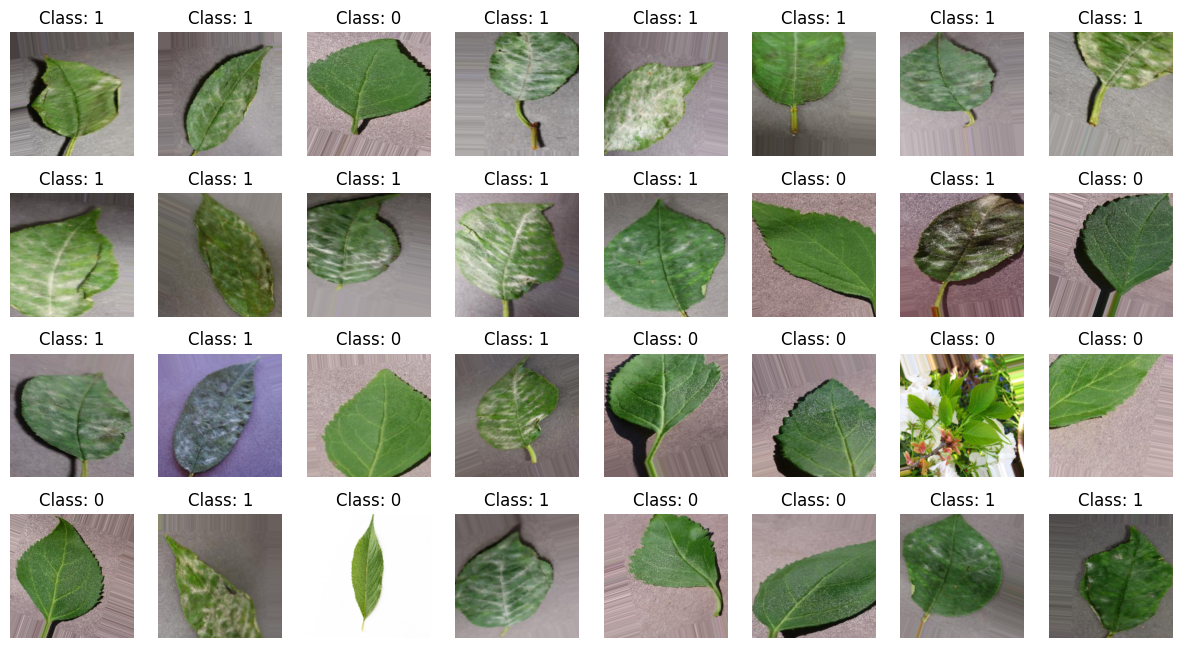

In [35]:
import matplotlib.pyplot as plt
# Get batch of images from the generator
batch = train_generator.next()
# Plot the images in a grid
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(15, 8))
for i, ax in enumerate(axes.flatten()):
 ax.imshow(batch[0][i])
 ax.axis('off')
 ax.set_title(f'Class: {np.argmax(batch[1][i])}')
plt.show()

In [36]:
train_generator.class_indices

{'Cherry__healthy': 0, 'Cherry__powdery_mildew': 1}

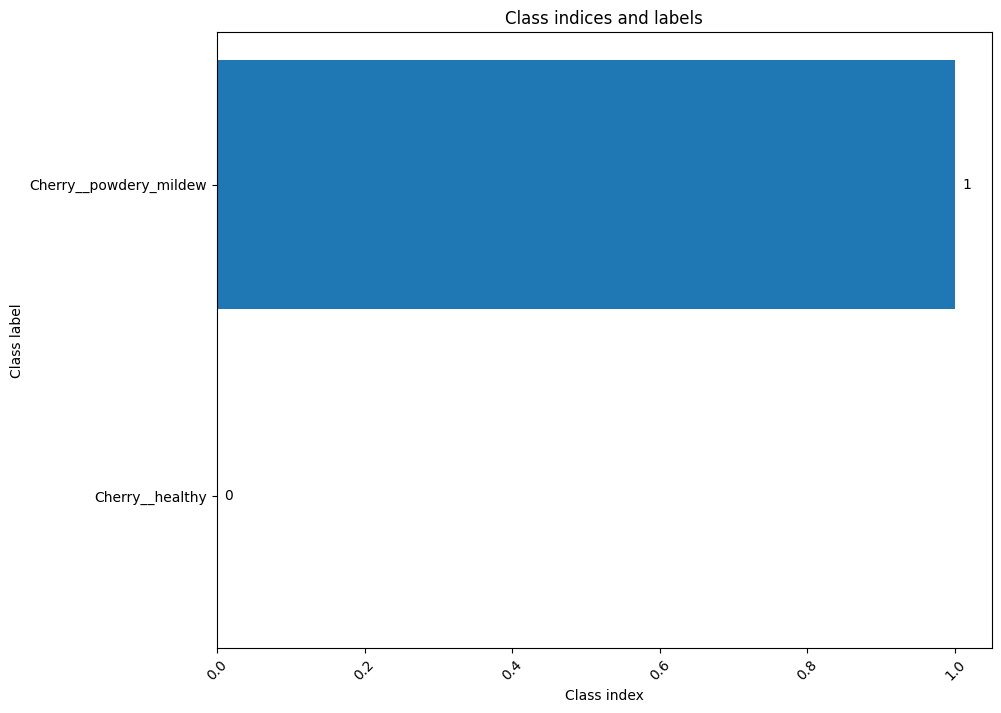

In [42]:
 import matplotlib.pyplot as plt
# Get class indices and labels from the generator
class_indices = train_generator.class_indices
class_labels = list(class_indices.keys())
class_indices = list(class_indices.values())
# Plot a horizontal bar chart of the class indices and labels
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(class_labels, class_indices)
ax.set_xlabel('Class index')
ax.set_ylabel('Class label')
ax.set_title('Class indices and labels')
plt.xticks(rotation=45)
# Add labels to the bars
for i, bar in enumerate(bars):
    ax.annotate(str(class_indices[i]), xy=(bar.get_width(), bar.get_y() + bar.get_height() / 2),
                xytext=(5, 0), textcoords='offset points', ha='left', va='center')
plt.show()

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
class_names = os.listdir(folder)

In [40]:
class_names

['Cherry__healthy', 'Cherry__powdery_mildew']

In [41]:
import os
import numpy as np
from PIL import Image
train_dir = '/content/drive/MyDrive/Team_5/Cherry_leaf_dataset'
class_names = sorted(os.listdir(train_dir))
num_classes = len(class_names)
X = []
y = []
for class_id, class_name in enumerate(class_names):
 for file in os.listdir(train_dir + '/' + class_name):
     image_path = train_dir + '/' + class_name + '/' + file
     image = Image.open(image_path).resize((100, 100))
     X.append(np.array(image))
     y.append(class_id)
X = np.array(X)
y = np.array(y)

In [43]:
X

array([[[[203, 191, 193],
         [203, 189, 192],
         [206, 190, 193],
         ...,
         [219, 205, 205],
         [208, 194, 194],
         [199, 185, 185]],

        [[202, 190, 192],
         [198, 185, 187],
         [206, 190, 193],
         ...,
         [208, 194, 194],
         [208, 194, 194],
         [209, 195, 195]],

        [[207, 193, 196],
         [208, 193, 196],
         [206, 191, 194],
         ...,
         [217, 203, 203],
         [217, 203, 203],
         [212, 198, 198]],

        ...,

        [[199, 185, 185],
         [205, 191, 191],
         [211, 197, 197],
         ...,
         [208, 196, 194],
         [216, 203, 186],
         [214, 200, 171]],

        [[202, 188, 188],
         [193, 179, 179],
         [204, 190, 190],
         ...,
         [210, 200, 199],
         [218, 204, 203],
         [223, 207, 204]],

        [[200, 186, 186],
         [211, 197, 197],
         [211, 197, 197],
         ...,
         [205, 200, 190],
        

In [44]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train images shape:", X_train.shape)
print("Train labels shape:", y_train.shape)
print("Validation images shape:", X_test.shape)
print("Validation labels shape:", y_test.shape)

Train images shape: (1566, 100, 100, 3)
Train labels shape: (1566,)
Validation images shape: (392, 100, 100, 3)
Validation labels shape: (392,)


In [78]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [79]:
IMAGE_SIZE = 256
BATCH_SIZE = 32

In [80]:
resize_rescale = tf.keras.Sequential([
 layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
 layers.experimental.preprocessing.Rescaling(1./255)
])

In [81]:
CHANNELS =3

In [82]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = len(class_names)

In [83]:
model = models.Sequential([
 resize_rescale,
 layers.Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = input_shape),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
 layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(n_classes, activation='softmax'),
])


In [84]:
model.build(input_shape = input_shape)

In [85]:
model.compile(
 optimizer = 'adam',
 loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
 metrics = ['accuracy']
)

In [86]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_4 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_12 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPooli  (32, 127, 127, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (32, 62, 62, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (32, 60, 60, 64)         

In [87]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
49/49 [==============================] - 119s 2s/step - loss: 0.4809 - accuracy: 0.7765 - val_loss: 0.2809 - val_accuracy: 0.9107
Epoch 2/20
49/49 [==============================] - 118s 2s/step - loss: 0.2228 - accuracy: 0.9349 - val_loss: 0.1419 - val_accuracy: 0.9617
Epoch 3/20
49/49 [==============================] - 120s 2s/step - loss: 0.1819 - accuracy: 0.9470 - val_loss: 0.1127 - val_accuracy: 0.9719
Epoch 4/20
49/49 [==============================] - 120s 2s/step - loss: 0.1260 - accuracy: 0.9668 - val_loss: 0.1240 - val_accuracy: 0.9694
Epoch 5/20
49/49 [==============================] - 119s 2s/step - loss: 0.0918 - accuracy: 0.9764 - val_loss: 0.0533 - val_accuracy: 0.9847
Epoch 6/20
49/49 [==============================] - 120s 2s/step - loss: 0.0648 - accuracy: 0.9821 - val_loss: 0.0625 - val_accuracy: 0.9770
Epoch 7/20
49/49 [==============================] - 119s 2s/step - loss: 0.0675 - accuracy: 0.9821 - val_loss: 0.0478 - val_accuracy: 0.9847
Epoch 8/20
49

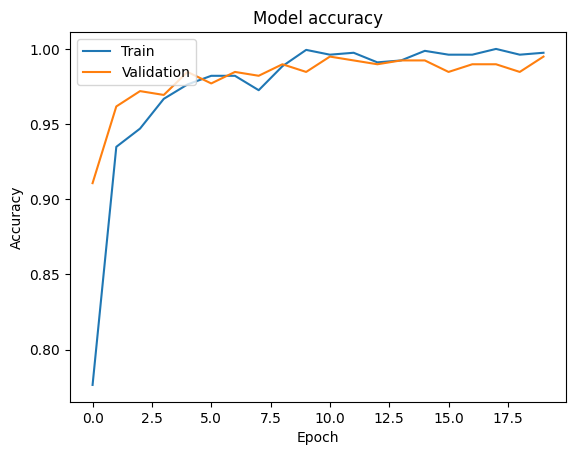

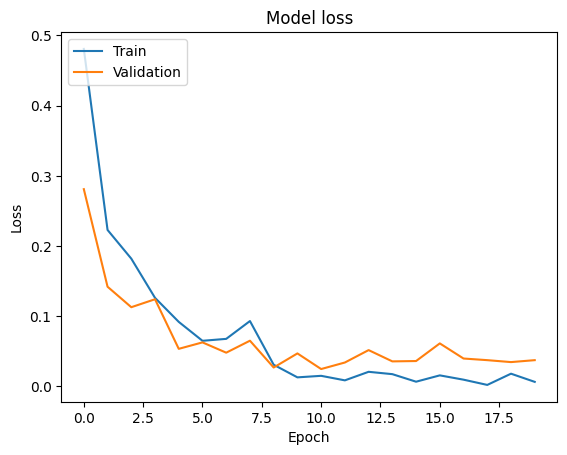

In [88]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [89]:
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

13/13 [==============================] - 9s 664ms/step


In [90]:
cm = confusion_matrix(y_test, predicted_labels)

In [91]:
cm

array([[180,   2],
       [  0, 210]])

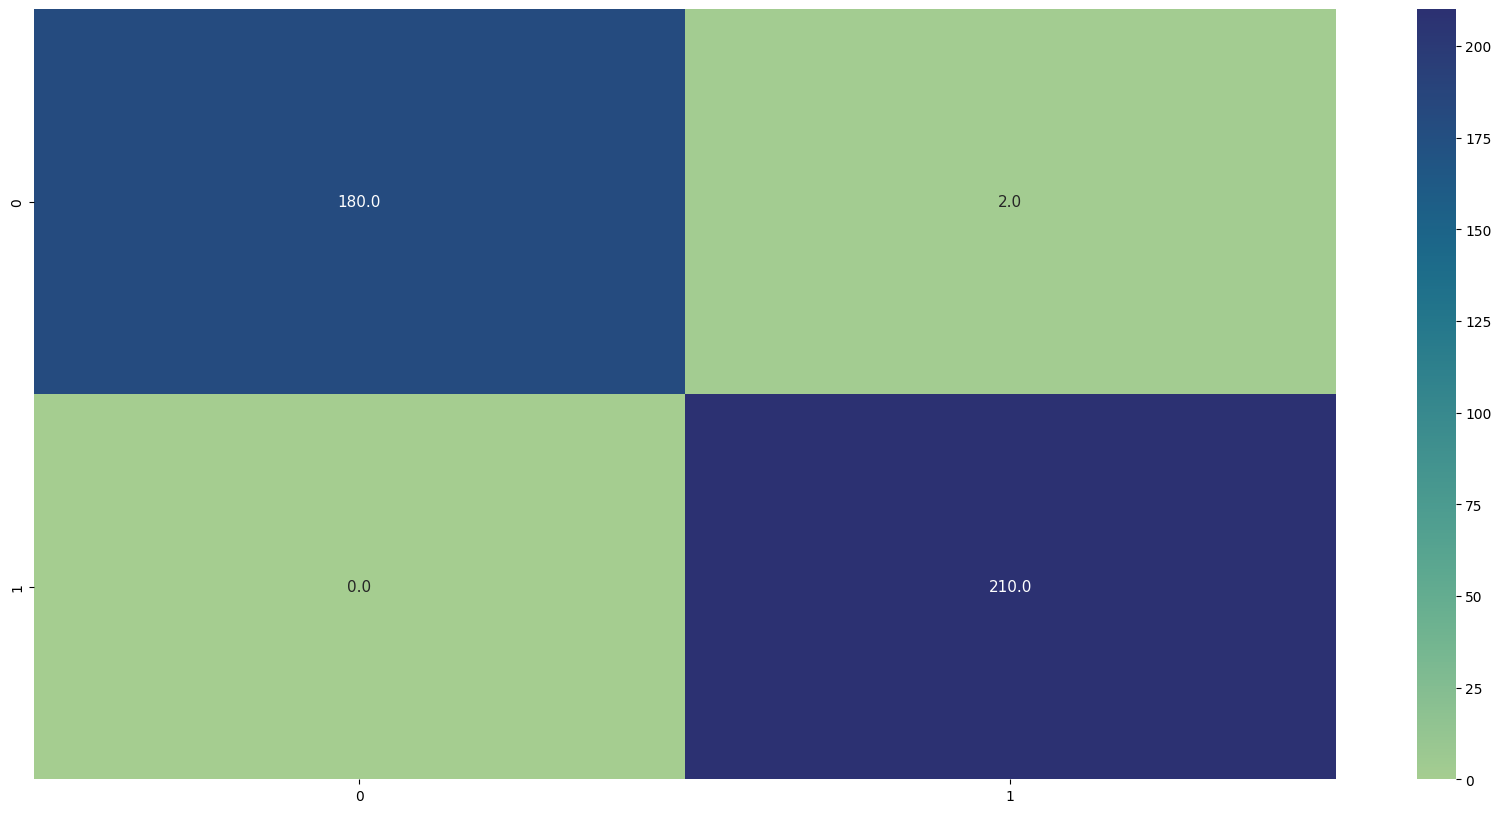

In [92]:
plt.figure(figsize=(21, 10)) # Set the figure size as desired
sns.heatmap(cm, annot=True, cmap="crest", fmt=".1f", annot_kws={"fontsize":11})
# Show the plot
plt.show()

In [93]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy*100:.2f}%')

13/13 [==============================] - 8s 648ms/step - loss: 0.0372 - accuracy: 0.9949
Test accuracy: 99.49%


In [94]:
model.save('cherry_health_classifier.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
